In [1]:
# Import pandas
import pandas as pd

# Import numpy
import  numpy as np

# Import maptplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Import seaborn
import seaborn as sns

# Importing required libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data from csv file named "CarPrice_Assignment.csv"
pricedata = pd.read_csv("CarPrice_Assignment.csv", encoding = "ISO-8859-1", low_memory=False)

#############################################################################################
# Data Cleaning, Data Preparation and EDA
#############################################################################################

In [3]:
# Dataset info
pricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### All the data types for columns shown above are ok.

#########################################################################
### Converting the values for the following columns to lowercase
The following columns are of type object
<br />
<br />CarName
<br />fueltype
<br />aspiration
<br />doornumber
<br />carbody
<br />drivewheel
<br />enginelocation
<br />enginetype
<br />cylindernumber
<br />fuelsystem
#########################################################################

In [4]:
# Convert values in CarName column to lowercase
pricedata['CarName'] = pricedata['CarName'].str.lower()

In [5]:
# Convert values in fueltype column to lowercase
pricedata['fueltype'] = pricedata['fueltype'].str.lower()

In [6]:
# Convert values in aspiration column to lowercase
pricedata['aspiration'] = pricedata['aspiration'].str.lower()

In [7]:
# Convert values in doornumber column to lowercase
pricedata['doornumber'] = pricedata['doornumber'].str.lower()

In [8]:
# Convert values in carbody column to lowercase
pricedata['carbody'] = pricedata['carbody'].str.lower()

In [9]:
# Convert values in drivewheel column to lowercase
pricedata['drivewheel'] = pricedata['drivewheel'].str.lower()

In [10]:
# Convert values in enginelocation column to lowercase
pricedata['enginelocation'] = pricedata['enginelocation'].str.lower()

In [11]:
# Convert values in enginetype column to lowercase
pricedata['enginetype'] = pricedata['enginetype'].str.lower()

In [12]:
# Convert values in cylindernumber column to lowercase
pricedata['cylindernumber'] = pricedata['cylindernumber'].str.lower()

In [13]:
# Convert values in fuelsystem column to lowercase
pricedata['fuelsystem'] = pricedata['fuelsystem'].str.lower()

In [14]:
# Displaying top 5 rows of data
pricedata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### As can be seen above, all the data is in lower case.

########################
### For Column car_ID
########################

In [15]:
# Removing the column car_ID as it has unique ID for each observations
pricedata.drop('car_ID',axis=1,inplace=True)

In [16]:
# Viewing the info of dataset
pricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#### As can been in the list above, the column 'car_ID' is removed. The data types for all the columns is ok.

#########################
### For Column CarName
#########################

In [17]:
pricedata.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu mu-x', 'isuzu d-max ',
       'isuzu d-max v-cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

#### Splitting the string for Car Company from 'CarName' column. Assign the Car Company Name to a new variable CompanyName.

In [18]:
# Splitting the string for Car Company from 'CarName' column. Assign the Car Company Name to a new variable CompanyName.
pricedata['companyname'] = pricedata['CarName'].str.split(' ').str[0]

#### Dropping the column CarName as the only value required from that column is the name of the Car Company. The name of the car company has been assigned to a column CompanyName and thus deleting the column CarName

In [19]:
# Removing the column CarName
pricedata.drop('CarName',axis=1,inplace=True)

In [20]:
# Displaying the info for dataset
pricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

#### As can be seen above the column 'companyname' is added and column 'CarName' is removed. The data types for columns is ok.

###############################
### For Column companyname
###############################

In [21]:
pricedata.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### As can be seen above the unique values of column CompanyName is seen. There is seen some error in names as follows:
#### 1. maxda should have been spelled as mazda
#### 2. porcshce should have been spelled as porsche
#### 3. toyouta should have been spelled as toyota
#### 4. vokswagen should have been spelled as volkswagen
#### 5. vw should have been spelled as volkswagen

In [22]:
# Replacing the value maxda with mazda in column 'CompanyName'
pricedata['companyname'] = pricedata['companyname'].replace(['maxda'],'mazda')

In [23]:
# Replacing the value porcshce with porsche in column 'CompanyName'
pricedata['companyname'] = pricedata['companyname'].replace(['porcshce'],'porsche')

In [24]:
# Replacing the value toyouta with toyota in column 'CompanyName'
pricedata['companyname'] = pricedata['companyname'].replace(['toyouta'],'toyota')

In [25]:
# Replacing the value vokswagen with volkswagen in column 'CompanyName'
pricedata['companyname'] = pricedata['companyname'].replace(['vokswagen'],'volkswagen')

In [26]:
# Replacing the value vw with volkswagen in column 'CompanyName'
pricedata['companyname'] = pricedata['companyname'].replace(['vw'],'volkswagen')

In [27]:
# Display the unique values in column companyname
pricedata.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

#### As can be seen above, the correction has been done in the values for column CompanyName

###############################
### For Column fueltype
###############################

In [28]:
# Display the unique values in column fueltype
pricedata.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

#### The unique values for column fueltype is ok, so no need for any data cleaning

###############################
### For Column aspiration
###############################

In [29]:
# Display the unique values in column aspiration
pricedata.aspiration.unique()

array(['std', 'turbo'], dtype=object)

#### The unique values for column aspiration is ok, so no need for any data cleaning

###############################
### For Column doornumber
###############################

In [30]:
# Display the unique values in column doornumber
pricedata.doornumber.unique()

array(['two', 'four'], dtype=object)

#### The unique values for column doornumber is ok, so no need for any data cleaning

###############################
### For Column drivewheel
###############################

In [31]:
# Display the unique values in column drivewheel
pricedata.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

#### The unique values for column drivewheel is ok, so no need for any data cleaning

###############################
### For Column enginelocation
###############################

In [32]:
# Display the unique values in column enginelocation
pricedata.enginelocation.unique()

array(['front', 'rear'], dtype=object)

#### The unique values for column enginelocation is ok, so no need for any data cleaning

###############################
### For Column enginetype
###############################

In [33]:
# Display the unique values in column enginetype
pricedata.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

#### The unique values for column enginetype is ok, so no need for any data cleaning

###############################
### For Column cylindernumber
###############################

In [34]:
# Display the unique values in column cylindernumber
pricedata.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

#### The unique values for column cylindernumber is ok, so no need for any data cleaning

###############################
### For Column fuelsystem
###############################

In [35]:
# Display the unique values in column fuelsystem
pricedata.fuelsystem.unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

#### The unique values for column fuelsystem is ok, so no need for any data cleaning

###############################
### For Column carbody
###############################

In [36]:
# Display the unique values in column carbody
pricedata.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

#### The unique values for column carbody is ok, so no need for any data cleaning

###############################
### For Column symboling
###############################

In [37]:
pricedata.symboling.describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [38]:
pricedata.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

#### The data for Column 'symboling' is ok, no need for any data cleaning. 

###############################
### For Column wheelbase
###############################

In [39]:
pricedata.wheelbase.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

In [40]:
pricedata.wheelbase.unique()

array([ 88.6,  94.5,  99.8,  99.4, 105.8,  99.5, 101.2, 103.5, 110. ,
        88.4,  93.7, 103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,
       102. ,  93.1,  95.3,  98.8, 104.9, 106.7, 115.6,  96.6, 120.9,
       112. , 102.7,  93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2,
       107.9, 114.2, 108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,
        96.9,  95.7, 102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

#### The data for Column 'wheelbase' is ok, no need for any data cleaning.

###############################
### For Column carlength
###############################

In [41]:
pricedata.carlength.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64

In [42]:
pricedata.carlength.unique()

array([168.8, 171.2, 176.6, 177.3, 192.7, 178.2, 176.8, 189. , 193.8,
       197. , 141.1, 155.9, 158.8, 157.3, 174.6, 173.2, 144.6, 150. ,
       163.4, 157.1, 167.5, 175.4, 169.1, 170.7, 172.6, 199.6, 191.7,
       159.1, 166.8, 169. , 177.8, 175. , 190.9, 187.5, 202.6, 180.3,
       208.1, 199.2, 178.4, 173. , 172.4, 165.3, 170.2, 165.6, 162.4,
       173.4, 181.7, 184.6, 178.5, 186.7, 198.9, 167.3, 168.9, 175.7,
       181.5, 186.6, 156.9, 157.9, 172. , 173.5, 173.6, 158.7, 169.7,
       166.3, 168.7, 176.2, 175.6, 183.5, 187.8, 171.7, 159.3, 165.7,
       180.2, 183.1, 188.8])

#### The data for Column 'carlength' is ok, no need for any data cleaning.

###############################
### For Column carwidth
###############################

In [43]:
pricedata.carwidth.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: carwidth, dtype: float64

In [44]:
pricedata.carwidth.unique()

array([64.1, 65.5, 66.2, 66.4, 66.3, 71.4, 67.9, 64.8, 66.9, 70.9, 60.3,
       63.6, 63.8, 64.6, 63.9, 64. , 65.2, 62.5, 66. , 61.8, 69.6, 70.6,
       64.2, 65.7, 66.5, 66.1, 70.3, 71.7, 70.5, 72. , 68. , 64.4, 65.4,
       68.4, 68.3, 65. , 72.3, 66.6, 63.4, 65.6, 67.7, 67.2, 68.9, 68.8])

#### The data for Column 'carwidth' is ok, no need for any data cleaning.

###############################
### For Column carheight
###############################

In [45]:
pricedata.carheight.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: carheight, dtype: float64

In [46]:
pricedata.carheight.unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 53.2, 50.8,
       50.6, 59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4,
       52.8, 47.8, 49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8,
       49.4, 51.6, 54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. ,
       59.1, 53.9, 55.6, 56.2, 57.5])

#### The data for Column 'carheight' is ok, no need for any data cleaning.

###############################
### For Column curbweight
###############################

In [47]:
pricedata.curbweight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64

In [48]:
pricedata.curbweight.unique()

array([2548, 2823, 2337, 2824, 2507, 2844, 2954, 3086, 3053, 2395, 2710,
       2765, 3055, 3230, 3380, 3505, 1488, 1874, 1909, 1876, 2128, 1967,
       1989, 2191, 2535, 2811, 1713, 1819, 1837, 1940, 1956, 2010, 2024,
       2236, 2289, 2304, 2372, 2465, 2293, 2734, 4066, 3950, 1890, 1900,
       1905, 1945, 1950, 2380, 2385, 2500, 2410, 2443, 2425, 2670, 2700,
       3515, 3750, 3495, 3770, 3740, 3685, 3900, 3715, 2910, 1918, 1944,
       2004, 2145, 2370, 2328, 2833, 2921, 2926, 2365, 2405, 2403, 1889,
       2017, 1938, 1951, 2028, 1971, 2037, 2008, 2324, 2302, 3095, 3296,
       3060, 3071, 3139, 3020, 3197, 3430, 3075, 3252, 3285, 3485, 3130,
       2818, 2778, 2756, 2800, 3366, 2579, 2460, 2658, 2695, 2707, 2758,
       2808, 2847, 2050, 2120, 2240, 2190, 2340, 2510, 2290, 2455, 2420,
       2650, 1985, 2040, 2015, 2280, 3110, 2081, 2109, 2275, 2094, 2122,
       2140, 2169, 2204, 2265, 2300, 2540, 2536, 2551, 2679, 2714, 2975,
       2326, 2480, 2414, 2458, 2976, 3016, 3131, 31

#### The data for Column 'curbweight' is ok, no need for any data cleaning. 

###############################
### For Column enginesize
###############################

In [49]:
pricedata.enginesize.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

In [50]:
pricedata.enginesize.unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145], dtype=int64)

#### The data for Column 'enginesize' is ok, no need for any data cleaning. 

###############################
### For Column boreratio
###############################

In [51]:
pricedata.boreratio.describe()

count    205.000000
mean       3.329756
std        0.270844
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: boreratio, dtype: float64

In [52]:
pricedata.boreratio.unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 2.91, 3.03, 2.97, 3.34,
       3.6 , 2.92, 3.15, 3.43, 3.63, 3.54, 3.08, 3.33, 3.39, 3.76, 3.58,
       3.46, 3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.7 , 3.61, 3.94, 3.74,
       2.54, 3.05, 3.27, 3.24, 3.01])

#### The data for Column 'boreratio' is ok, no need for any data cleaning. 

###############################
### For Column stroke
###############################

In [53]:
pricedata.stroke.describe()

count    205.000000
mean       3.255415
std        0.313597
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

In [54]:
pricedata.stroke.unique()

array([2.68 , 3.47 , 3.4  , 2.8  , 3.19 , 3.39 , 3.03 , 3.11 , 3.23 ,
       3.46 , 3.9  , 3.41 , 3.07 , 3.58 , 4.17 , 2.76 , 3.15 , 3.255,
       3.16 , 3.64 , 3.1  , 3.35 , 3.12 , 3.86 , 3.29 , 3.27 , 3.52 ,
       2.19 , 3.21 , 2.9  , 2.07 , 2.36 , 2.64 , 3.08 , 3.5  , 3.54 ,
       2.87 ])

#### The data for Column 'stroke' is ok, no need for any data cleaning. 

######################################
### For Column compressionratio
######################################

In [55]:
pricedata.compressionratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64

In [56]:
pricedata.compressionratio.unique()

array([ 9.  , 10.  ,  8.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  9.5 ,  9.6 ,
        9.41,  9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 , 11.5 ,  8.6 ,
       22.7 , 22.  , 21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  8.7 ,
        9.31,  9.3 ,  7.7 , 22.5 , 23.  ])

#### The data for Column 'compressionratio' is ok, no need for any data cleaning. 

###############################
### For Column horsepower
###############################

In [57]:
pricedata.horsepower.describe()

count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [58]:
pricedata.horsepower.unique()

array([111, 154, 102, 115, 110, 140, 160, 101, 121, 182,  48,  70,  68,
        88, 145,  58,  76,  60,  86, 100,  78,  90, 176, 262, 135,  84,
        64, 120,  72, 123, 155, 184, 175, 116,  69,  55,  97, 152, 200,
        95, 142, 143, 207, 288,  73,  82,  94,  62,  56, 112,  92, 161,
       156,  52,  85, 114, 162, 134, 106], dtype=int64)

#### The data for Column 'horsepower' is ok, no need for any data cleaning. 

###############################
### For Column peakrpm
###############################

In [59]:
pricedata.peakrpm.describe()

count     205.000000
mean     5125.121951
std       476.985643
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64

In [60]:
pricedata.peakrpm.unique()

array([5000, 5500, 5800, 4250, 5400, 5100, 4800, 6000, 4750, 4650, 4200,
       4350, 4500, 5200, 4150, 5600, 5900, 5750, 5250, 4900, 4400, 6600,
       5300], dtype=int64)

#### The data for Column 'peakrpm' is ok, no need for any data cleaning. 

###############################
### For Column citympg
###############################

In [61]:
pricedata.citympg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

In [62]:
pricedata.citympg.unique()

array([21, 19, 24, 18, 17, 16, 23, 20, 15, 47, 38, 37, 31, 49, 30, 27, 25,
       13, 26, 36, 22, 14, 45, 28, 32, 35, 34, 29, 33], dtype=int64)

#### The data for Column 'citympg' is ok, no need for any data cleaning. 

###############################
### For Column highwaympg
###############################

In [63]:
pricedata.highwaympg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64

In [64]:
pricedata.highwaympg.unique()

array([27, 26, 30, 22, 25, 20, 29, 28, 53, 43, 41, 38, 24, 54, 42, 34, 33,
       31, 19, 17, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46], dtype=int64)

#### The data for Column 'highwaympg' is ok, no need for any data cleaning. 

###############################
### For Column price
###############################

In [65]:
pricedata.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [66]:
pricedata.price.nunique()

189

#### The data for Column 'price'  is ok, no need for any data cleaning.

##########################################
### Columns with NA or blank values
##########################################

In [67]:
# Counting the number of NA or blanl spaces in each of the columns
count_na_values = pricedata.isnull().sum()

In [68]:
# Displaying the columns and the number of NA or blank spaces in the respective column
count_na_values

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
companyname         0
dtype: int64

#### As can be seen above, there is none NA or Blank spaces in the values in any of the columns. Thus no rows or columns are removed or value prediction for missing values in rows or column is required.

###############################
### Removing duplicate rows
###############################

In [69]:
# Displaying the shape of the dataset
pricedata.shape

(205, 25)

In [70]:
# Dropping the duplicate rows in the dataset
pricedata = pricedata.drop_duplicates()

In [71]:
# Displaying the shape of the dataset
pricedata.shape

(205, 25)

#### As shown above the number of observations in the dataset remains the same, thus there are no duplicate rows of data in the dataset

############################################
### Columns with only 1 unique value
############################################

In [72]:
# Getting the number of unique values from each column in the dataset
unique_data = pricedata.nunique()

In [73]:
# Getting the names of columns with number of unique values which is equal to 1
unique_data = unique_data[unique_data.values == 1]

In [74]:
# Diaplaying the names of the columns with number of unique values which is equal to 1
unique_data

Series([], dtype: int64)

#### As can be seen above, all the columns have more than 1 unique values, thus no column is removed

#######################################################
### Categorical Variables
#######################################################

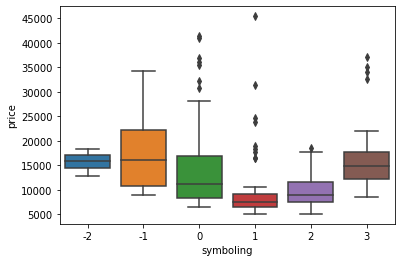

In [75]:
# Box plot symboling and price
sns.boxplot(x = pricedata.symboling, y = pricedata.price, data = pricedata)
plt.show()

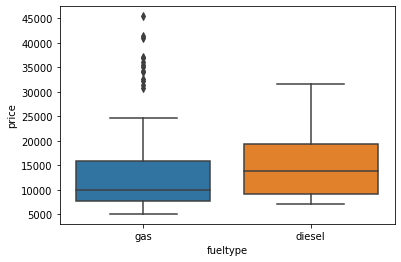

In [76]:
# Box plot fueltype and price
sns.boxplot(x = pricedata.fueltype, y = pricedata.price, data = pricedata)
plt.show()

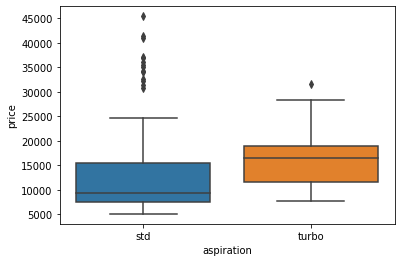

In [77]:
# Box plot aspiration and price
sns.boxplot(x = pricedata.aspiration, y = pricedata.price, data = pricedata)
plt.show()

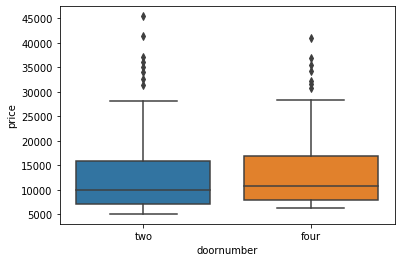

In [78]:
# Box plot doornumber and price
sns.boxplot(x = pricedata.doornumber, y = pricedata.price, data = pricedata)
plt.show()

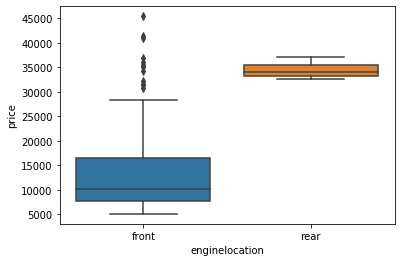

In [79]:
# Box plot enginelocation and price
sns.boxplot(x = pricedata.enginelocation, y = pricedata.price, data = pricedata)
plt.show()

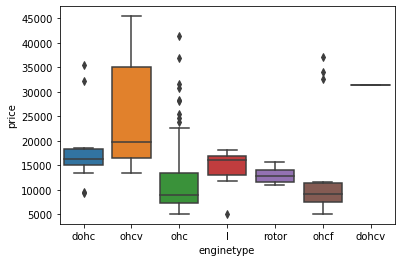

In [80]:
# Box plot enginetype and price
sns.boxplot(x = pricedata.enginetype, y = pricedata.price, data = pricedata)
plt.show()

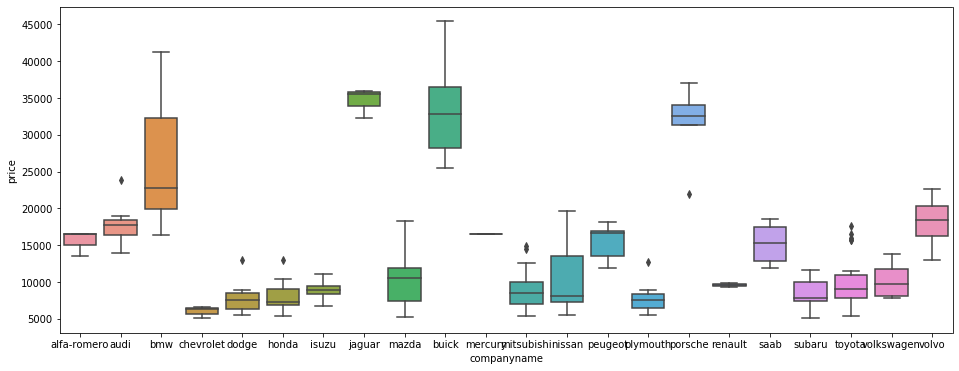

In [81]:
# Box plot companyname and price
plt.figure(figsize=[16,6])
sns.boxplot(x = pricedata.companyname, y = pricedata.price, data = pricedata)
plt.show()

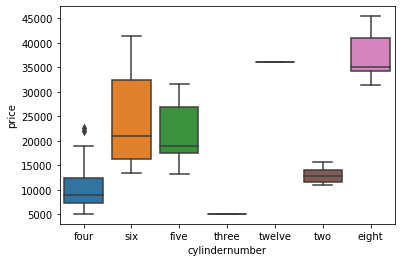

In [82]:
# Box plot cylindernumber and price
sns.boxplot(x = pricedata.cylindernumber, y = pricedata.price, data = pricedata)
plt.show()

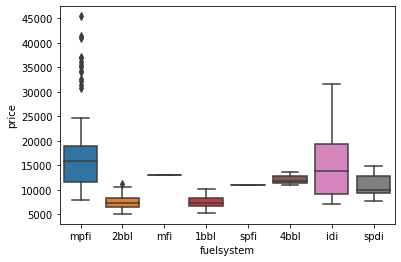

In [83]:
# Box plot fuelsystem and price
sns.boxplot(x = pricedata.fuelsystem, y = pricedata.price, data = pricedata)
plt.show()

In [84]:
# Describing the variable
pricedata.wheelbase.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

#### The range for variable wheelbase chosen is
1) low - upto 94 <br />
2) Medium - from 94 upto 97 <br />
3) Medium-High - from 97 upto 102 <br />
4) High - above 102 <br />

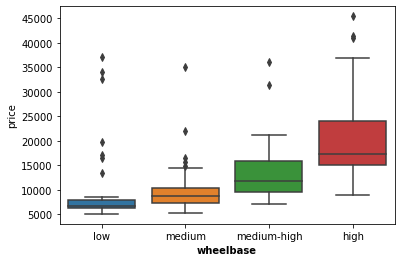

In [85]:
# Box plot of wheelbase and price
box_plot_data = np.nan

# Assigning calue as 'low' to box_plot_data for wheelbase <= 94
box_plot_data = np.where((pricedata['wheelbase'] <= 94),'low',box_plot_data)

# Assigning calue as 'low' to box_plot_data for wheelbase > 94 and wheelbase <= 97
box_plot_data = np.where((pricedata['wheelbase'] > 94) & (pricedata['wheelbase'] <= 97),'medium',box_plot_data)

# Assigning calue as 'low' to box_plot_data for wheelbase > 97 and wheelbase <= 102
box_plot_data = np.where((pricedata['wheelbase'] > 97) & (pricedata['wheelbase'] <= 102),'medium-high',box_plot_data)

# Assigning calue as 'low' to box_plot_data for wheelbase > 102
box_plot_data = np.where((pricedata['wheelbase'] > 102),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('wheelbase', fontweight ='bold')
plt.show()

In [86]:
# Describing the variable
pricedata.carlength.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64

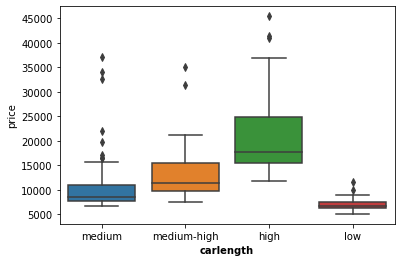

In [87]:
# Box plot of carlength and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['carlength'] <= 166),'low',box_plot_data)
box_plot_data = np.where((pricedata['carlength'] > 166) & (pricedata['carlength'] <= 173),'medium',box_plot_data)
box_plot_data = np.where((pricedata['carlength'] > 173) & (pricedata['carlength'] <= 183),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['carlength'] > 183),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('carlength', fontweight ='bold')
plt.show()

In [88]:
# Describing the variable
pricedata.carwidth.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: carwidth, dtype: float64

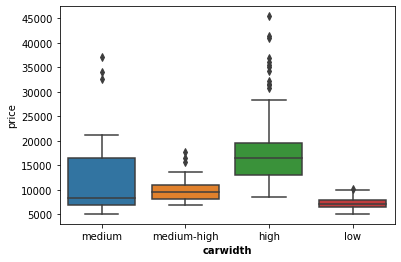

In [89]:
# Box plot of carwidth and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['carwidth'] <= 64),'low',box_plot_data)
box_plot_data = np.where((pricedata['carwidth'] > 64) & (pricedata['carwidth'] <= 65),'medium',box_plot_data)
box_plot_data = np.where((pricedata['carwidth'] > 65) & (pricedata['carwidth'] <= 66),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['carwidth'] > 66),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('carwidth', fontweight ='bold')
plt.show()

In [90]:
# Describing the variable
pricedata.enginesize.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

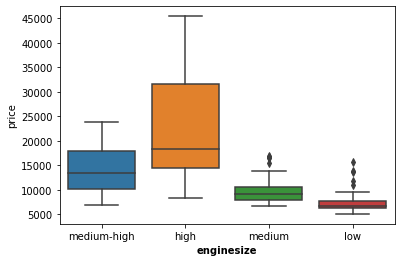

In [91]:
# Box plot of enginesize and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['enginesize'] <= 97),'low',box_plot_data)
box_plot_data = np.where((pricedata['enginesize'] > 97) & (pricedata['enginesize'] <= 120),'medium',box_plot_data)
box_plot_data = np.where((pricedata['enginesize'] > 120) & (pricedata['enginesize'] <= 141),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['enginesize'] > 141),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('enginesize', fontweight ='bold')
plt.show()

In [92]:
# Describing the variable
pricedata.carheight.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: carheight, dtype: float64

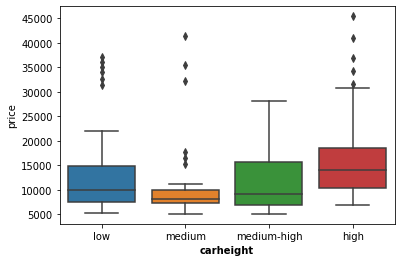

In [93]:
# Box plot of carheight and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['carheight'] <= 52),'low',box_plot_data)
box_plot_data = np.where((pricedata['carheight'] > 52) & (pricedata['carheight'] <= 54),'medium',box_plot_data)
box_plot_data = np.where((pricedata['carheight'] > 54) & (pricedata['carheight'] <= 55),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['carheight'] > 55),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('carheight', fontweight ='bold')
plt.show()

In [94]:
# Describing the variable
pricedata.curbweight.describe()

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64

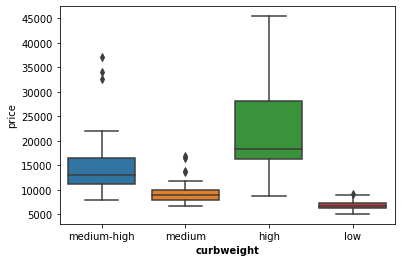

In [95]:
# Box plot of curbweight and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['curbweight'] <= 2145),'low',box_plot_data)
box_plot_data = np.where((pricedata['curbweight'] > 2145) & (pricedata['curbweight'] <= 2414),'medium',box_plot_data)
box_plot_data = np.where((pricedata['curbweight'] > 2414) & (pricedata['curbweight'] <= 2935),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['curbweight'] > 2935),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('curbweight', fontweight ='bold')
plt.show()

In [96]:
# Describing the variable
pricedata.boreratio.describe()

count    205.000000
mean       3.329756
std        0.270844
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: boreratio, dtype: float64

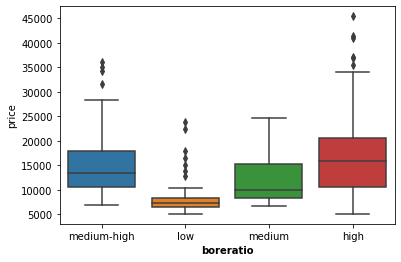

In [97]:
# Box plot of boreratio and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['boreratio'] <= 3.15),'low',box_plot_data)
box_plot_data = np.where((pricedata['boreratio'] > 3.15) & (pricedata['boreratio'] <= 3.31),'medium',box_plot_data)
box_plot_data = np.where((pricedata['boreratio'] > 3.31) & (pricedata['boreratio'] <= 3.58),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['boreratio'] > 3.58),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('boreratio', fontweight ='bold')
plt.show()

In [98]:
# Describing the variable
pricedata.stroke.describe()

count    205.000000
mean       3.255415
std        0.313597
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

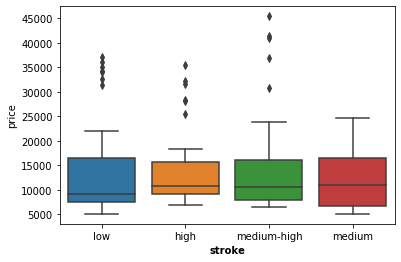

In [99]:
# Box plot of stroke and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['stroke'] <= 3.11),'low',box_plot_data)
box_plot_data = np.where((pricedata['stroke'] > 3.11) & (pricedata['stroke'] <= 3.29),'medium',box_plot_data)
box_plot_data = np.where((pricedata['stroke'] > 3.29) & (pricedata['stroke'] <= 3.41),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['stroke'] > 3.41),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('stroke', fontweight ='bold')
plt.show()

In [100]:
# Describing the variable
pricedata.compressionratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64

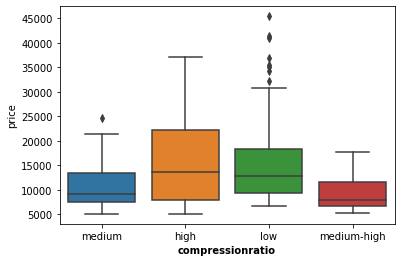

In [101]:
# Box plot of compressionratio and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['compressionratio'] <= 8.6),'low',box_plot_data)
box_plot_data = np.where((pricedata['compressionratio'] > 8.6) & (pricedata['compressionratio'] <= 9),'medium',box_plot_data)
box_plot_data = np.where((pricedata['compressionratio'] > 9) & (pricedata['compressionratio'] <= 9.4),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['compressionratio'] > 9.4),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('compressionratio', fontweight ='bold')
plt.show()

In [102]:
# Describing the variable
pricedata.horsepower.describe()

count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

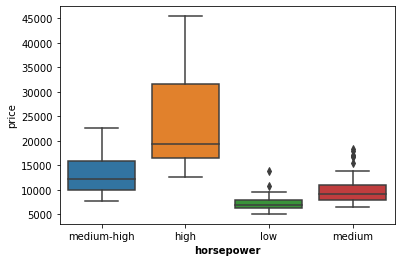

In [103]:
# Box plot of horsepower and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['horsepower'] <= 70),'low',box_plot_data)
box_plot_data = np.where((pricedata['horsepower'] > 70) & (pricedata['horsepower'] <= 95),'medium',box_plot_data)
box_plot_data = np.where((pricedata['horsepower'] > 95) & (pricedata['horsepower'] <= 116),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['horsepower'] > 116),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('horsepower', fontweight ='bold')
plt.show()

In [104]:
# Describing the variable
pricedata.peakrpm.describe()

count     205.000000
mean     5125.121951
std       476.985643
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64

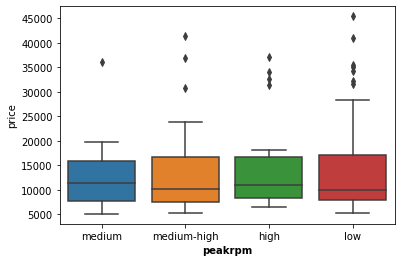

In [105]:
# Box plot of peakrpm and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['peakrpm'] <= 4800),'low',box_plot_data)
box_plot_data = np.where((pricedata['peakrpm'] > 4800) & (pricedata['peakrpm'] <= 5200),'medium',box_plot_data)
box_plot_data = np.where((pricedata['peakrpm'] > 5200) & (pricedata['peakrpm'] <= 5500),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['peakrpm'] > 5500),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('peakrpm', fontweight ='bold')
plt.show()

In [106]:
# Describing the variable
pricedata.citympg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

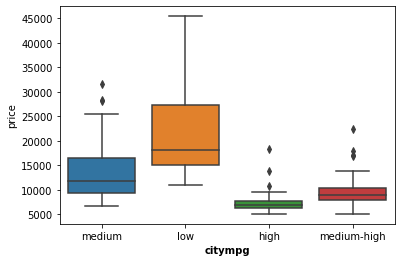

In [107]:
# Box plot of citympg and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['citympg'] <= 19),'low',box_plot_data)
box_plot_data = np.where((pricedata['citympg'] > 19) & (pricedata['citympg'] <= 24),'medium',box_plot_data)
box_plot_data = np.where((pricedata['citympg'] > 24) & (pricedata['citympg'] <= 30),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['citympg'] > 30),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('citympg', fontweight ='bold')
plt.show()

In [108]:
# Describing the variable
pricedata.highwaympg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64

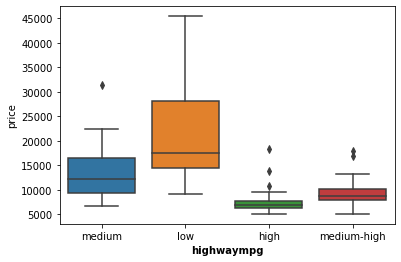

In [109]:
# Box plot of highwaympg and price
box_plot_data = np.nan
box_plot_data = np.where((pricedata['highwaympg'] <= 25),'low',box_plot_data)
box_plot_data = np.where((pricedata['highwaympg'] > 25) & (pricedata['highwaympg'] <= 30),'medium',box_plot_data)
box_plot_data = np.where((pricedata['highwaympg'] > 30) & (pricedata['highwaympg'] <= 34),'medium-high',box_plot_data)
box_plot_data = np.where((pricedata['highwaympg'] > 34),'high',box_plot_data)
sns.boxplot(x = box_plot_data, y = pricedata.price, data = pricedata)
plt.xlabel('highwaympg', fontweight ='bold')
plt.show()

### Based on the above box plot following is the analysis:

highwaympg - distinguishable pattern is seen in the price of the cars
<br /> citympg - distinguishable pattern is seen in the price of the cars
<br /> peakrpm - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> horsepower - distinguishable pattern is seen in the price of the cars
<br /> compressionratio - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> stroke - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> boreratio - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> curbweight - distinguishable pattern is seen in the price of the cars
<br /> enginesize - distinguishable pattern is seen in the price of the cars
<br /> carlength - distinguishable pattern is seen in the price of the cars
<br /> wheelbase - distinguishable pattern is seen in the price of the cars
<br /> carheight - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> carwidth - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> fuelsystem - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> symboling - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> fuel type - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> aspiration - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> doornumber - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> enginetype - there is not high amount of distinuishable pattern seen in the prices of the cars as the variables
<br /> companyname - distinguishable pattern is seen in the price of the cars
<br /> cylindernumber - distinguishable pattern is seen in the price of the cars
<br /> enginelocaion - distinguishable pattern is seen in the price of the cars

#######################################
### Creating dummy variables

#### For following columns
'fueltype'
<br />'aspiration'
<br />'doornumber'
<br />'carbody'
<br />'drivewheel'
<br />'enginelocation'
<br />'fuelsystem'
<br />'companyname'
<br />'enginetype'
<br />'cylindernumber'
#######################################

In [110]:
# List of variables
variable_list = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem','companyname','enginetype','cylindernumber']

In [111]:
# Creating dummy variables
variable_list_dummy_variables = pd.get_dummies(pricedata[variable_list])

In [112]:
# Displaying dummy variables
variable_list_dummy_variables.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


#### For Column 'fueltype' there are 2 columns in dummy variables. It is only required to keep 1 column. Thus drop the column 'fueltype_gas'

#### For Column 'aspiration' there are 2 columns in dummy variables. It is only required to keep 1 column. Thus drop the column 'aspiration_std'

#### For Column 'doornumber' there are 2 columns in dummy variables. It is only required to keep 1 column. Thus drop the column 'doornumber_two'

#### For Column 'carbody' there are 5 columns in dummy variables. It is only required to keep 4 column. Thus drop the column 'carbody_wagon'

#### For Column 'drivewheel' there are 3 columns in dummy variables. It is only required to keep 2 column. Thus drop the column 'drivewheel_fwd'

#### For Column 'enginelocation' there are 2 columns in dummy variables. It is only required to keep 1 column. Thus drop the column 'enginelocation_rear'

#### For Column 'fuelsystem' there are 8 columns in dummy variables. It is only required to keep 7 column. Thus drop the column 'fuelsystem_spfi'

#### For Column 'companyname' there are 22 columns in dummy variables. It is only required to keep 21 column. Thus drop the column 'companyname_mercury'

#### For Column 'enginetype' there are 7 columns in dummy variables. It is only required to keep 6 column. Thus drop the column 'enginetype_rotor'

#### For Column 'cylindernumber' there are 7 columns in dummy variables. It is only required to keep 6 column. Thus drop the column 'cylindernumber_five'


In [113]:
# Dropping the total of 10 columns shown above
variable_list_dummy_variables = variable_list_dummy_variables.drop(['fueltype_gas','aspiration_std','doornumber_two','carbody_wagon','drivewheel_fwd','enginelocation_rear','fuelsystem_spfi','companyname_mercury','enginetype_rotor','cylindernumber_five'],axis=1)

In [114]:
# Displaying the remaining 50 columns and top 5 rows for dummy variables
variable_list_dummy_variables.head()

,fueltype_diesel,aspiration_turbo,doornumber_four,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,drivewheel_4wd,drivewheel_rwd,enginelocation_front,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,0


#### As it can be seen above all the 10 columns for dummy variables have been drop

In [115]:
# Adding the 50 remaining columns to original dataframe
pricedata_new = pd.concat([pricedata,variable_list_dummy_variables],axis=1)

#### As dummy variables for the following columns are added to the dataframe, it is required to drop the following columns:
fueltype
<br />aspiration
<br />doornumber
<br />carbody
<br />drivewheel
<br />enginelocation
<br />fuelsystem
<br />companyname
<br />enginetype
<br />cylindernumber

In [116]:
# Dropping the total of 10 columns shown above
pricedata_new = pricedata_new.drop(['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem','companyname','enginetype','cylindernumber'],axis=1)

In [117]:
# Getting and printing the names of all the columns
total_columns = pricedata_new.columns.tolist()
print(total_columns)

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'fueltype_diesel', 'aspiration_turbo', 'doornumber_four', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'drivewheel_4wd', 'drivewheel_rwd', 'enginelocation_front', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'companyname_alfa-romero', 'companyname_audi', 'companyname_bmw', 'companyname_buick', 'companyname_chevrolet', 'companyname_dodge', 'companyname_honda', 'companyname_isuzu', 'companyname_jaguar', 'companyname_mazda', 'companyname_mitsubishi', 'companyname_nissan', 'companyname_peugeot', 'companyname_plymouth', 'companyname_porsche', 'companyname_renault', 'companyname_saab', 'companyname_subaru', 'companyname_toyota', 'companyname_volkswagen', 'companyname_volvo', 'engin

####################################################################
### Splitting the data into training set and testing set
####################################################################

In [118]:
# Dividing the data set into training set and testing set. The training data and testing data will always have the same rows
np.random.seed(0)
train_pricedata, test_pricedata = train_test_split(pricedata_new, train_size = 0.75, test_size = 0.25, random_state = 100)

In [119]:
print("After data cleaning is completed there are {} rows and {} columns for training data set. ".format((train_pricedata.shape)[0],(train_pricedata.shape)[1]))

After data cleaning is completed there are 153 rows and 65 columns for training data set. 


In [120]:
print("After data cleaning is completed there are {} rows and {} columns for testing data set. ".format((test_pricedata.shape)[0],(test_pricedata.shape)[1]))

After data cleaning is completed there are 52 rows and 65 columns for testing data set. 


In [121]:
# Displaying top five rows of data of training data set
train_pricedata.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
164,1,94.5,168.7,64.0,52.6,2204,98,3.19,3.03,9.0,...,0,1,0,0,0,1,0,0,0,0
188,2,97.3,171.7,65.5,55.7,2300,109,3.19,3.40,10.0,...,0,1,0,0,0,1,0,0,0,0
7,1,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,...,0,1,0,0,0,0,0,0,0,0
158,0,95.7,166.3,64.4,53.0,2275,110,3.27,3.35,22.5,...,0,1,0,0,0,1,0,0,0,0
123,-1,103.3,174.6,64.6,59.8,2535,122,3.35,3.46,8.5,...,0,1,0,0,0,1,0,0,0,0


#########################################################
### Rescaling the features
#########################################################

In [122]:
# Min-max scaling
scaler = MinMaxScaler()

In [123]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'symboling', 'wheelbase', 'carlength', 'carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']

In [124]:
# Apply fit_transform to Training data
train_pricedata[num_vars] = scaler.fit_transform(train_pricedata[num_vars])

In [125]:
# Apply transform to Test data
test_pricedata[num_vars] = scaler.transform(test_pricedata[num_vars])

In [126]:
# Displaying the Train Data
train_pricedata.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,...,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.562092,0.409759,0.525862,0.459150,0.486220,0.406996,0.241460,0.497718,0.539942,0.196904,...,0.058824,0.699346,0.084967,0.058824,0.019608,0.745098,0.130719,0.006536,0.006536,0.026144
std,0.242521,0.202947,0.200082,0.184837,0.208172,0.205790,0.151958,0.204628,0.157197,0.247580,...,0.236067,0.460048,0.279749,0.236067,0.139104,0.437237,0.338200,0.080845,0.080845,0.160087
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.272414,0.409756,0.308333,0.350000,0.248254,0.135849,0.357143,0.464646,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.341379,0.502439,0.425000,0.491667,0.355702,0.184906,0.468254,0.555556,0.125000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.800000,0.503448,0.637398,0.525000,0.641667,0.552366,0.301887,0.682540,0.616162,0.150000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


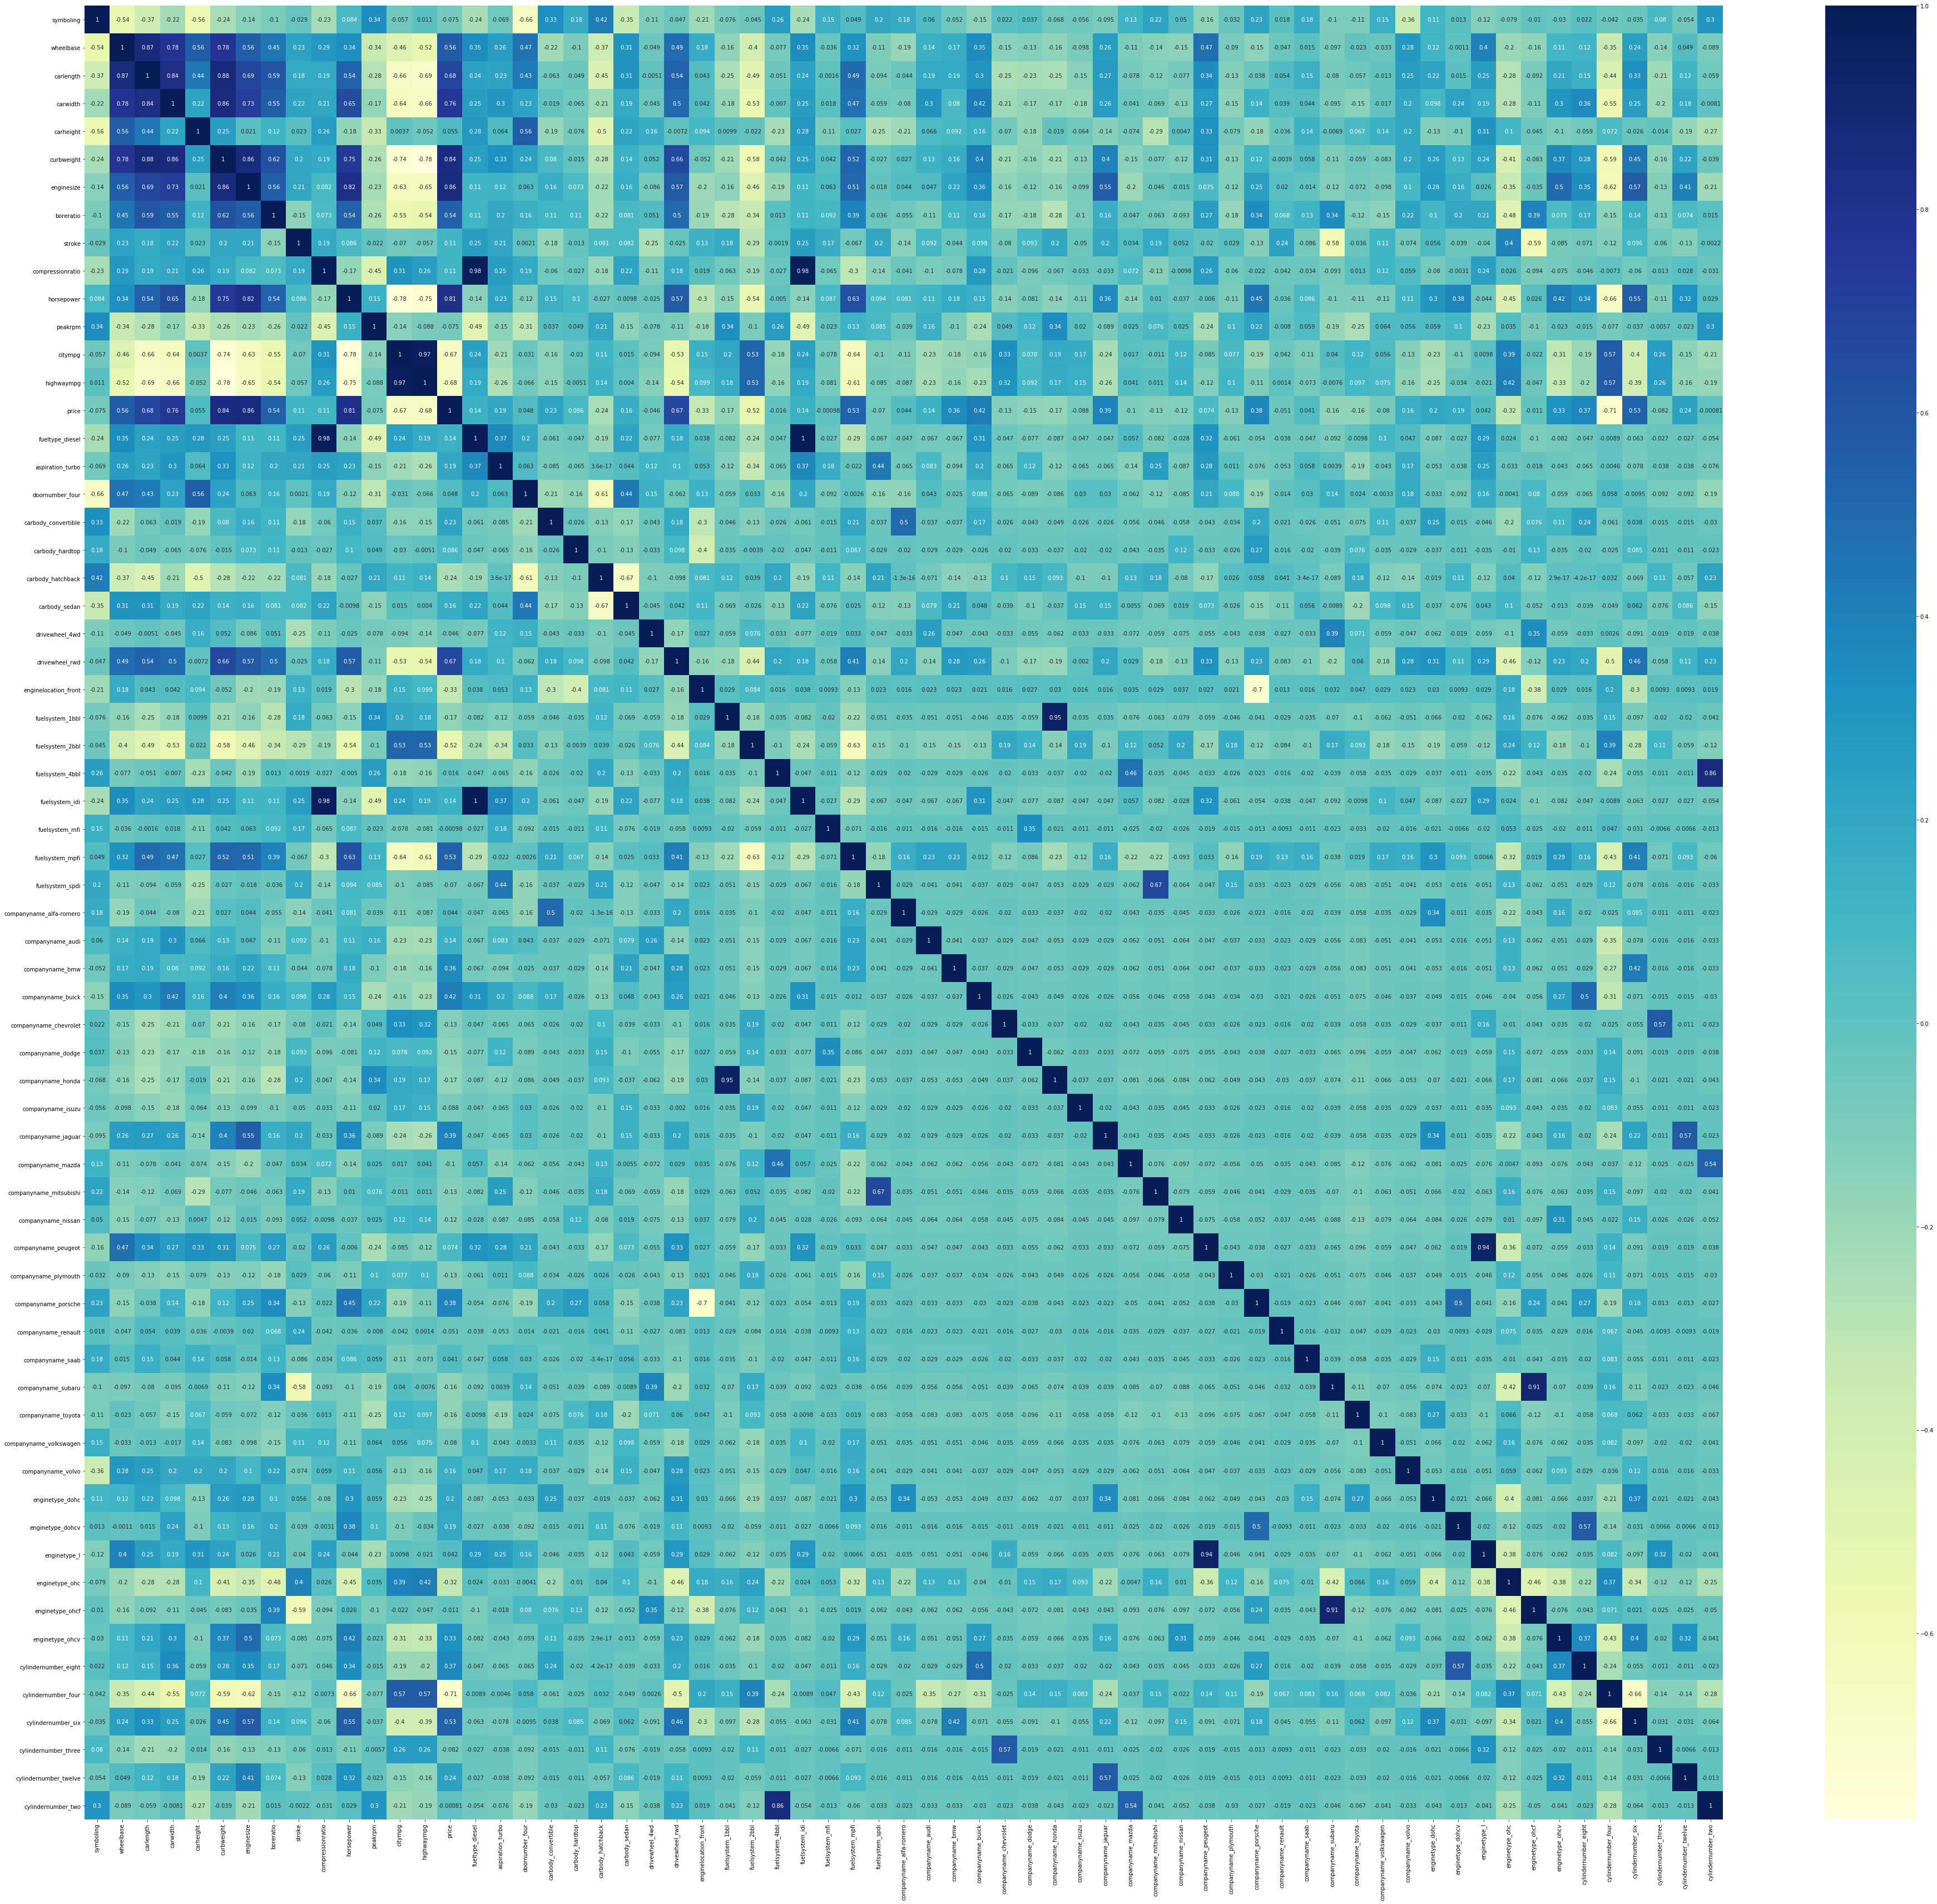

In [127]:
 #Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (66, 60))
sns.heatmap(train_pricedata.corr(), annot = True, cmap="YlGnBu")
plt.show()#

In [128]:
corr = train_pricedata.corr().unstack().sort_values(ascending=False)
pd.set_option('display.max_rows', len(corr))
print(corr)
pd.reset_option('display.max_rows')

cylindernumber_two       cylindernumber_two         1.000000e+00
fuelsystem_mpfi          fuelsystem_mpfi            1.000000e+00
companyname_audi         companyname_audi           1.000000e+00
companyname_bmw          companyname_bmw            1.000000e+00
companyname_buick        companyname_buick          1.000000e+00
companyname_chevrolet    companyname_chevrolet      1.000000e+00
companyname_dodge        companyname_dodge          1.000000e+00
companyname_honda        companyname_honda          1.000000e+00
companyname_isuzu        companyname_isuzu          1.000000e+00
companyname_jaguar       companyname_jaguar         1.000000e+00
companyname_mazda        companyname_mazda          1.000000e+00
companyname_mitsubishi   companyname_mitsubishi     1.000000e+00
companyname_nissan       companyname_nissan         1.000000e+00
companyname_peugeot      companyname_peugeot        1.000000e+00
companyname_plymouth     companyname_plymouth       1.000000e+00
companyname_porsche      

#### As seen above there is high correlation (greater than 0.85 and less than -0.85) between the following input variables:
fueltype_diesel and fuelsystem_idi (1.0)
<br /> fueltype_diesel and compressionratio (0.9844)
<br /> fuelsystem_idi and compressionratio (0.9844)
<br /> highwaympg and citympg (0.9725)
<br /> fuelsystem_1bbl and companyname_honda (0.9453)
<br /> enginetype_l and companyname_peugeot (0.9395)
<br /> companyname_subaru and enginetype_ohcf (0.9133)
<br /> curbweight and carlength (0.8764)
<br /> wheelbase and carlength (0.8716)
<br /> fuelsystem_4bbl and cylindernumber_two (0.8631)
<br /> curbweight and enginesize (0.8621)
<br /> carwidth and curbweight (0.8587)

In [129]:
# Removing column fuelsystem_idi as the correlation shown above between fueltype_diesel and fuelsystem_idi is 1.0
# Thus fuelsystem_idi variable is not required. In this case both have the same values
train_pricedata.drop('fuelsystem_idi',axis=1,inplace=True)

####################################################################
### Dividing into X and Y sets for training set and test set
####################################################################

In [130]:
# Training data output variable
train_pricedata_output_variable =  train_pricedata['price']

In [131]:
# Training data input variables
# Dropping the price column
train_pricedata = train_pricedata.drop('price',axis=1)
train_pricedata_input_variables = train_pricedata

In [132]:
# Test data output variable
test_pricedata_output_variable =  test_pricedata['price']

In [133]:
# Test data input variables
# Dropping the price column
test_pricedata = test_pricedata.drop('price',axis=1)
test_pricedata_input_variables = test_pricedata

###########################################################
#### Plotting Output variable (Price) v/s Input variables
###########################################################

In [134]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.symboling)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const        0.256978
symboling   -0.066888
dtype: float64

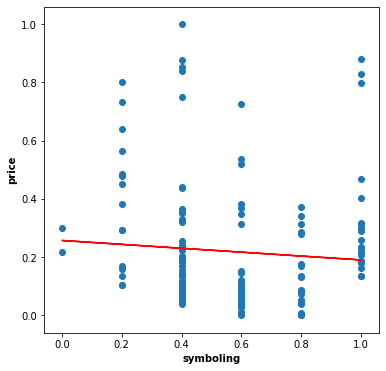

In [135]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.symboling*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('symboling', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [136]:
# Correlation between price and symboling
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.symboling)
print(round(correlation,4))

-0.0747


In [137]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.carlength)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const       -0.170059
carlength    0.740573
dtype: float64

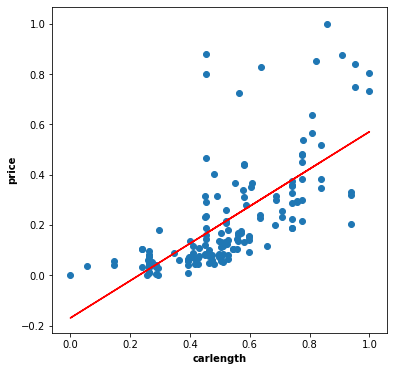

In [138]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.carlength*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('carlength', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [139]:
# Correlation between price and carlength
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.carlength)
print(round(correlation,4))

0.6823


In [140]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.carwidth)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const      -0.190427
carwidth    0.892533
dtype: float64

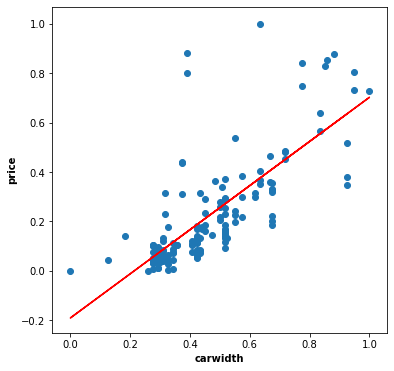

In [141]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.carwidth*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('carwidth', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [142]:
# Correlation between price and carwidth
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.carwidth)
print(round(correlation,4))

0.7596


In [143]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.carheight)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const        0.191659
carheight    0.057013
dtype: float64

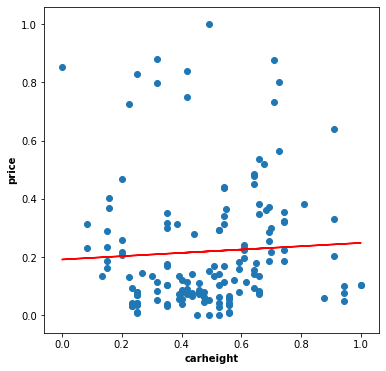

In [144]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.carheight*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('carheight', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [145]:
# Correlation between price and carheight
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.carheight)
print(round(correlation,4))

0.0547


In [146]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.enginesize)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const        -0.079046
enginesize    1.235924
dtype: float64

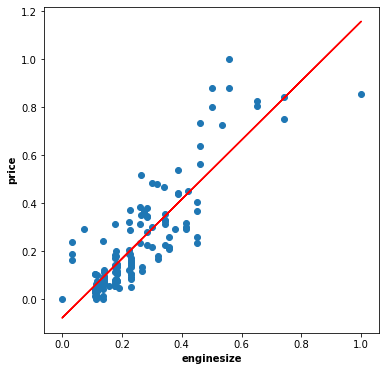

In [147]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.enginesize*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('enginesize', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [148]:
# Correlation between price and enginesize
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.enginesize)
print(round(correlation,4))

0.8648


In [149]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.boreratio)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const       -0.066714
boreratio    0.574812
dtype: float64

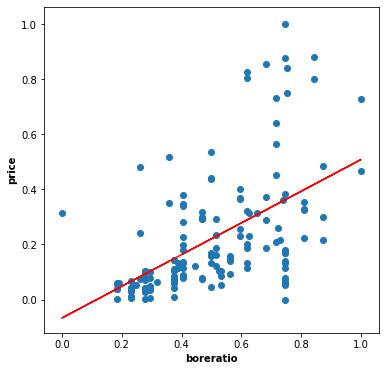

In [150]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.boreratio*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('boreratio', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [151]:
# Correlation between price and boreratio
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.boreratio)
print(round(correlation,4))

0.5416


In [152]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.stroke)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const     0.135102
stroke    0.156088
dtype: float64

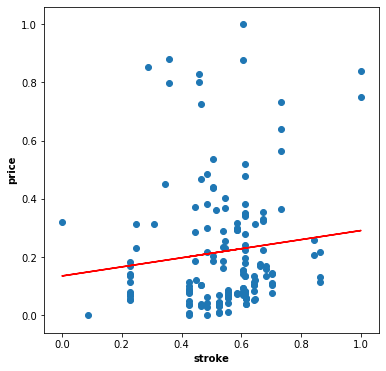

In [153]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.stroke*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('stroke', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [154]:
# Correlation between price and stroke
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.stroke)
print(round(correlation,4))

0.113


In [155]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.horsepower)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const        -0.020787
horsepower    1.059589
dtype: float64

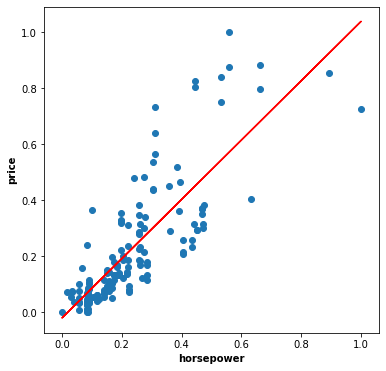

In [156]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.horsepower*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('horsepower', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [157]:
# Correlation between price and horsepower
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.horsepower)
print(round(correlation,4))

0.8134


In [158]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.peakrpm)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const      0.252628
peakrpm   -0.082837
dtype: float64

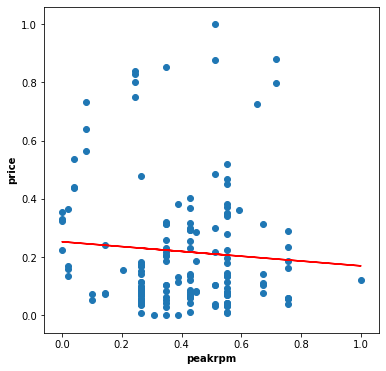

In [159]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.peakrpm*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('peakrpm', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [160]:
# Correlation between price and peakrpm
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.peakrpm)
print(round(correlation,4))

-0.0746


In [161]:
# Adding a constant
input_train_lm = sm.add_constant(train_pricedata_input_variables.citympg)

# Creating a fitted model
lr = sm.OLS(train_pricedata_output_variable, input_train_lm).fit()

# Showing the parameters
lr.params

const      0.491456
citympg   -0.789563
dtype: float64

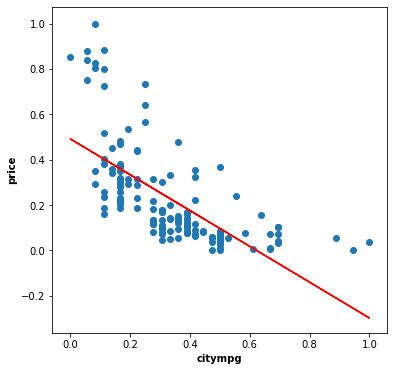

In [162]:
# Visualising the data with a scatter plot and the fitted regression line
plt.figure(figsize=[6,6])
plt.scatter(input_train_lm.iloc[:, 1], train_pricedata_output_variable)
plt.plot(input_train_lm.iloc[:, 1], lr.params.const + lr.params.citympg*input_train_lm.iloc[:, 1], 'r')
plt.xlabel('citympg', fontweight ='bold') 
plt.ylabel('price', fontweight ='bold')
plt.show()

In [163]:
# Correlation between price and citympg
correlation = train_pricedata_output_variable.corr(train_pricedata_input_variables.citympg)
print(round(correlation,4))

-0.6734


#### As seen in the above scatter plots with fitted regression line:

The following variables has correlation greater than 0.5 or less than -0.5
<br />citympg
<br />horsepower
<br />boreratio
<br />enginesize
<br />carwidth
<br />carlength
<br />
<br /> The following variables has very little correlation with price
<br />peakrpm
<br />stroke
<br />carheight
<br />symboling

################################################
# Regression Analysis
################################################

###############################################
### Recursive Feature Elimination
###############################################

In [164]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(train_pricedata_input_variables, train_pricedata_output_variable)

# Running RFE
rfe = RFE(lm, 10)
rfe = rfe.fit(train_pricedata_input_variables, train_pricedata_output_variable)

In [165]:
list(zip(train_pricedata_input_variables.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 49),
 ('wheelbase', False, 6),
 ('carlength', False, 34),
 ('carwidth', True, 1),
 ('carheight', False, 21),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 17),
 ('horsepower', False, 36),
 ('peakrpm', False, 9),
 ('citympg', False, 52),
 ('highwaympg', False, 8),
 ('fueltype_diesel', False, 16),
 ('aspiration_turbo', False, 10),
 ('doornumber_four', False, 40),
 ('carbody_convertible', False, 7),
 ('carbody_hardtop', False, 44),
 ('carbody_hatchback', False, 35),
 ('carbody_sedan', False, 46),
 ('drivewheel_4wd', False, 53),
 ('drivewheel_rwd', False, 37),
 ('enginelocation_front', True, 1),
 ('fuelsystem_1bbl', False, 45),
 ('fuelsystem_2bbl', False, 39),
 ('fuelsystem_4bbl', False, 31),
 ('fuelsystem_mfi', False, 11),
 ('fuelsystem_mpfi', False, 33),
 ('fuelsystem_spdi', False, 27),
 ('companyname_alfa-romero', False, 47),
 ('companyname_audi', False, 20),
 ('companyname_bmw', Tru

In [166]:
col = train_pricedata_input_variables.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio',
       'enginelocation_front', 'companyname_bmw', 'companyname_porsche',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

#############################################################################################################
### Building Regression Model

#### Based on the 15 variables identified in RFE, variables will be added in the model manually
#############################################################################################################

###########################################
### Linear Regression Model 1
###########################################

In [167]:
# Creating dataframe with all the 10 variables shown above in RFE analysis
train_input_rfe = train_pricedata_input_variables[['carwidth', 'curbweight', 'enginesize', 'boreratio', 'enginelocation_front', 'companyname_bmw','companyname_porsche','cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two']]

In [168]:
# Adding a constant variable 
train_input_rfe = sm.add_constant(train_input_rfe)

In [169]:
# Running the linear model
linear_model1 = sm.OLS(train_pricedata_output_variable,train_input_rfe).fit() 

In [170]:
#Let's see the summary of our linear model
print(linear_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     154.5
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.12e-71
Time:                        23:32:20   Log-Likelihood:                 206.39
No. Observations:                 153   AIC:                            -390.8
Df Residuals:                     142   BIC:                            -357.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [171]:
# Calculate the VIFs for the new model
train_input_rfe.drop(['const'], axis=1,inplace=True)
vif = pd.DataFrame()
X = train_input_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,44.60
0,carwidth,30.49
2,enginesize,25.01
3,boreratio,12.97
4,enginelocation_front,10.89
6,companyname_porsche,1.57
8,cylindernumber_twelve,1.48
9,cylindernumber_two,1.25
5,companyname_bmw,1.17
7,cylindernumber_three,1.06


###########################################################################
### Linear Regression Model 2

#### Drop variable cylindernumber_twelve variable from model 1 with p-value of 0.53
############################################################################

In [172]:
# Creating dataframe with RFE variables 
train_input_rfe = train_pricedata_input_variables[['carwidth', 'curbweight', 'enginesize', 'boreratio', 'enginelocation_front', 'companyname_bmw','companyname_porsche','cylindernumber_three', 'cylindernumber_two']]

In [173]:
# Adding a constant variable 
train_input_rfe = sm.add_constant(train_input_rfe)

In [174]:
# Running the linear model
linear_model2 = sm.OLS(train_pricedata_output_variable,train_input_rfe).fit() 

In [175]:
#Let's see the summary of our linear model
print(linear_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     172.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           3.70e-72
Time:                        23:32:20   Log-Likelihood:                 206.18
No. Observations:                 153   AIC:                            -392.4
Df Residuals:                     143   BIC:                            -362.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2100 

In [176]:
# Calculate the VIFs for the new model
train_input_rfe.drop(['const'], axis=1,inplace=True)
vif = pd.DataFrame()
X = train_input_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,curbweight,41.43
0,carwidth,30.48
2,enginesize,18.08
3,boreratio,12.90
4,enginelocation_front,10.86
6,companyname_porsche,1.51
8,cylindernumber_two,1.19
5,companyname_bmw,1.13
7,cylindernumber_three,1.05


##############################################################################
### Linear Regression Model 3

#### Drop curbweight variable from model 2 with VIF of 41.43
###############################################################################

In [177]:
# Creating dataframe with RFE variables 
train_input_rfe = train_pricedata_input_variables[['carwidth', 'enginesize', 'boreratio', 'enginelocation_front', 'companyname_bmw','companyname_porsche','cylindernumber_three', 'cylindernumber_two']]

In [178]:
# Adding a constant variable 
train_input_rfe = sm.add_constant(train_input_rfe)

In [179]:
# Running the linear model
linear_model3 = sm.OLS(train_pricedata_output_variable,train_input_rfe).fit() 

In [180]:
#Let's see the summary of our linear model
print(linear_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     169.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.37e-69
Time:                        23:32:21   Log-Likelihood:                 196.44
No. Observations:                 153   AIC:                            -374.9
Df Residuals:                     144   BIC:                            -347.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2187 

In [181]:
# Calculate the VIFs for the new model
train_input_rfe.drop(['const'], axis=1,inplace=True)
vif = pd.DataFrame()
X = train_input_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,19.28
2,boreratio,11.73
3,enginelocation_front,10.35
1,enginesize,10.21
5,companyname_porsche,1.36
7,cylindernumber_two,1.15
4,companyname_bmw,1.13
6,cylindernumber_three,1.05


##############################################################################
### Linear Regression Model 4

#### Drop boreratio variable from model 3 with VIF of 11.73 and p-value of 0.08
###############################################################################

In [182]:
# Creating dataframe with RFE variables 
train_input_rfe = train_pricedata_input_variables[['carwidth', 'enginesize', 'enginelocation_front', 'companyname_bmw','companyname_porsche','cylindernumber_three', 'cylindernumber_two']]

In [183]:
# Adding a constant variable 
train_input_rfe = sm.add_constant(train_input_rfe)

In [184]:
# Running the linear model
linear_model4 = sm.OLS(train_pricedata_output_variable,train_input_rfe).fit()

In [185]:
#Let's see the summary of our linear model
print(linear_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           7.64e-70
Time:                        23:32:22   Log-Likelihood:                 194.80
No. Observations:                 153   AIC:                            -373.6
Df Residuals:                     145   BIC:                            -349.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2063 

In [186]:
# Calculate the VIFs for the new model
train_input_rfe.drop(['const'], axis=1,inplace=True)
vif = pd.DataFrame()
X = train_input_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,18.45
1,enginesize,9.53
2,enginelocation_front,7.99
4,companyname_porsche,1.18
6,cylindernumber_two,1.14
3,companyname_bmw,1.13
5,cylindernumber_three,1.05


##############################################################################
### Linear Regression Model 5

#### Drop carwidth variable from model 5 with VIF of 18.45
###############################################################################

In [187]:
# Creating dataframe with RFE variables 
train_input_rfe = train_pricedata_input_variables[['enginesize', 'enginelocation_front', 'companyname_bmw','companyname_porsche','cylindernumber_three', 'cylindernumber_two']]

In [188]:
# Adding a constant variable 
train_input_rfe = sm.add_constant(train_input_rfe)

In [189]:
# Running the linear model
linear_model5 = sm.OLS(train_pricedata_output_variable,train_input_rfe).fit()

In [190]:
#Let's see the summary of our linear model
print(linear_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     135.4
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.48e-57
Time:                        23:32:23   Log-Likelihood:                 160.98
No. Observations:                 153   AIC:                            -308.0
Df Residuals:                     146   BIC:                            -286.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0835 

In [191]:
# Calculate the VIFs for the new model
train_input_rfe.drop(['const'], axis=1,inplace=True)
vif = pd.DataFrame()
X = train_input_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.15
1,enginelocation_front,3.82
3,companyname_porsche,1.17
2,companyname_bmw,1.11
5,cylindernumber_two,1.08
4,cylindernumber_three,1.03


##############################################################################
### Linear Regression Model 6

#### Drop cylindernumber_three variable from model 5 with  p-value of 0.328
###############################################################################

In [192]:
# Creating dataframe with RFE variables 
train_input_rfe = train_pricedata_input_variables[['enginesize', 'enginelocation_front', 'companyname_bmw','companyname_porsche','cylindernumber_two']]

In [193]:
# Adding a constant variable 
train_input_rfe = sm.add_constant(train_input_rfe)

In [194]:
# Running the linear model
linear_model6 = sm.OLS(train_pricedata_output_variable,train_input_rfe).fit()

In [195]:
#Let's see the summary of our linear model
print(linear_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           5.38e-58
Time:                        23:32:24   Log-Likelihood:                 160.48
No. Observations:                 153   AIC:                            -309.0
Df Residuals:                     147   BIC:                            -290.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0861 

In [196]:
# Calculate the VIFs for the new model
train_input_rfe.drop(['const'], axis=1,inplace=True)
vif = pd.DataFrame()
X = train_input_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,4.08
1,enginelocation_front,3.73
3,companyname_porsche,1.17
2,companyname_bmw,1.11
4,cylindernumber_two,1.07


##############################################################################
### Linear Regression Model 7

#### Drop enginelocation_front variable from model 6 with  p-value of 0.053
###############################################################################

In [197]:
# Creating dataframe with RFE variables 
train_input_rfe = train_pricedata_input_variables[['enginesize', 'companyname_bmw','companyname_porsche','cylindernumber_two']]

In [198]:
# Adding a constant variable 
train_input_rfe = sm.add_constant(train_input_rfe)

In [199]:
# Running the linear model
linear_model7 = sm.OLS(train_pricedata_output_variable,train_input_rfe).fit()

In [200]:
#Let's see the summary of our linear model
print(linear_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     198.2
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.34e-58
Time:                        23:32:24   Log-Likelihood:                 158.52
No. Observations:                 153   AIC:                            -307.0
Df Residuals:                     148   BIC:                            -291.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0837    

In [201]:
# Calculate the VIFs for the new model
train_input_rfe.drop(['const'], axis=1,inplace=True)
vif = pd.DataFrame()
X = train_input_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.18
1,companyname_bmw,1.10
2,companyname_porsche,1.08
3,cylindernumber_two,1.00


#########################################
### Residual Analysis
#########################################

In [202]:
# Adding const column
train_input_rfe = sm.add_constant(train_input_rfe)

In [203]:
# Predicting the output variable
y_train_price = linear_model7.predict(train_input_rfe)

Text(0.5, 0, 'Errors')

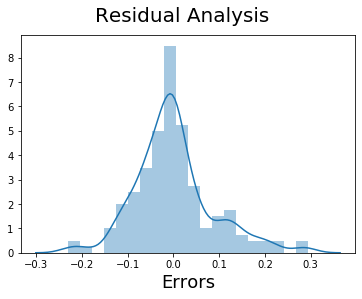

In [204]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((train_pricedata_output_variable - y_train_price), bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#########################################
### Test Data Predictions
#########################################

In [205]:
# Test data input variables
test_variables = ['enginesize', 'companyname_bmw','companyname_porsche','cylindernumber_two']
input_variables_test_data = test_pricedata_input_variables[test_variables]

In [206]:
# Adding const column
input_variables_test_data = sm.add_constant(input_variables_test_data)

In [207]:
# Making predictions
test_pricedata_output_variable_pred = linear_model7.predict(input_variables_test_data)

Text(0, 0.5, 'test_pricedata_output_variable_pred')

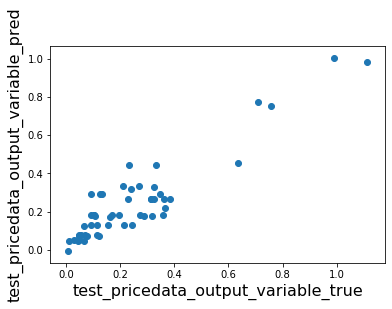

In [208]:
# Plotting test data
fig = plt.figure()
plt.scatter(test_pricedata_output_variable,test_pricedata_output_variable_pred)
plt.xlabel('test_pricedata_output_variable_true', fontsize=16)
plt.ylabel('test_pricedata_output_variable_pred', fontsize=16)  

In [209]:
# R-squared score for the test data
r2_score(y_true = test_pricedata_output_variable, y_pred = test_pricedata_output_variable_pred)

0.8470412703940504

#### The equation of our best fitted line is in Regression model 7 is:

<br /> price = -0.0837 + 1.1672 x enginesize + 0.2063 x companyname_bmw + 2.2537 x companyname_porsche + 0.2514 x cylindernumber_two
<br />
<br /> For train data set: R-squared: 0.843 abd R-squared (adj): 0.838
<br /> For test data set: R-squared: 0.8470
<br />
<br /> The VIF values are also very small:
<br />
<br /> enginesize - 1.18
<br /> companyname_bmw - 1.10
<br /> companyname_porsche - 1.08
<br /> cylindernumber_two - 1.00
<br />
<br /> Overall the model is decent with good R-squared values for both train data set and test data set and VIF values are also small and the variables chosen also have very less p-value < 0.001
<br />
<br /> But we can also do better with adding new input variables